# Tutorial 3: Mutiple Regression

## Question 1: Linear Regression

Create a random 1-dimensional vector of predictor variables, x, from a uniform distribution of size 100. The response variable 
y has a linear relationship with x according to the following equation:y=-5x+5+$\epsilon$, where $\epsilon$ corresponds to random noise sampled from a Gaussian
distribution with mean 0 and standard deviation of 2. 

__Step 1: Generate Dataset__

**<font color="red">Code:</font>**

Text(0, 0.5, 'y')

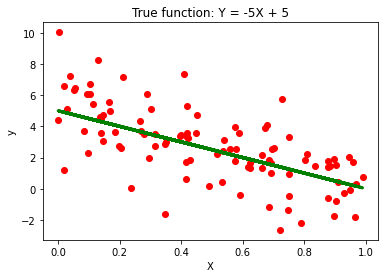

In [1]:
import numpy as np
import matplotlib.pyplot as plt

seed = 1            # seed for random number generation 
numInstances = 100   # number of data instances
np.random.seed(seed)
X = np.random.rand(numInstances,1).reshape(-1,1) # create x value that range from 0 to 1 uniformly distributed
Y_true = -5*X + 5                                # weight is -5 and intercept is +5 -> values between 0 to 5
Y = Y_true + np.random.normal(0,2,numInstances).reshape(-1,1) #the true Y is corrupted by gaussian noise (mean of 0 and sd of 2)
plt.scatter(X, Y,  color='red')
plt.plot(X, Y_true, color='green', linewidth=3)
plt.title('True function: Y = -5X + 5')
plt.xlabel('X')
plt.ylabel('y')

In [2]:
print(X.shape, Y_true.shape, Y.shape)

(100, 1) (100, 1) (100, 1)


In [3]:
X[:5], Y_true[:5], Y[:5]

(array([[4.17022005e-01],
        [7.20324493e-01],
        [1.14374817e-04],
        [3.02332573e-01],
        [1.46755891e-01]]),
 array([[2.91488998],
        [1.39837753],
        [4.99942813],
        [3.48833714],
        [4.26622055]]),
 array([[ 3.54615987],
        [-2.6460249 ],
        [ 4.3870201 ],
        [ 5.14428642],
        [ 4.72641002]]))

__Step 2: Perform Linear Regression__

Use Python scikit-learn package to fit a multiple linear regression (MLR) model. Given a training set {X,Y}, MLR 
is designed to learn the regression function $f(X,w) = X^T w + w_0$ by minimizing the following loss function given
a training set $\{X_i,Y_i\}_{i=1}^N$:
    $$L(y,f(X,w)) = \sum_{i=1}^N \|Y_i - X_i w - w_0\|^2,$$
 
where $w$ (slope) and $w_0$ (intercept) are the regression coefficients.

Given the input dataset, the following steps are performed:
    
1.Split the input data into their respective training and test sets.

2.Fit multiple linear regression to the training data.

3.Apply the model to the test data.

4.Evaluate the performance of the model.

5.Postprocessing: Visualizing the fitted model.

__1)Split the Data into Training and Test Set for both output Y and variable X in the ratio of 70:30.
This mean 70:30 since we have 100 data__
    
1)X_train (70% of X data)

2)X_test (30% of X data)

3)Y_train (70% of Y data)

4)Y_test (30% of Y data)

**<font color="red">Code:</font>**

In [4]:
numTrain = 70   # number of training instances
numTest = numInstances - numTrain
X_train = X[:-numTest]      #first numTrain sample of X
X_test = X[-numTest:]       #the numTrain+1 sample onwards of X
Y_train = Y[:-numTest]
Y_test = Y[-numTest:]
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(70, 1) (30, 1) (70, 1) (30, 1)


In [5]:
X_train[:3], X_test[:3], Y_train[:3], Y_test[:3]

(array([[4.17022005e-01],
        [7.20324493e-01],
        [1.14374817e-04]]),
 array([[0.90340192],
        [0.1374747 ],
        [0.13927635]]),
 array([[ 3.54615987],
        [-2.6460249 ],
        [ 4.3870201 ]]),
 array([[1.54192107],
        [4.5880289 ],
        [4.45926052]]))

__2)Fit Regression Model to Training Set__

Import sklearn linear model and call LinearRegression method followed by fit.

**<font color="red">Code:</font>**

In [6]:
from sklearn import linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

# Fit regression model to the training set
regr = regr.fit(X_train, Y_train)

__3)Apply the trained model to the test set with predict method to get predict Y__

**<font color="red">Code:</font>**

In [7]:
# Apply model to the test set
Y_pred_test = regr.predict(X_test)

__4)Evaluate the performance on test set output using RMSE and $R^2$ score__

Import mean_squared_error and $R^2$ score from sklearn.metrics. Plot the measured Y values verus predicted Y values

**<font color="red">Code: </font>**

Root mean squared error = 2.0842
R-squared = 0.4079


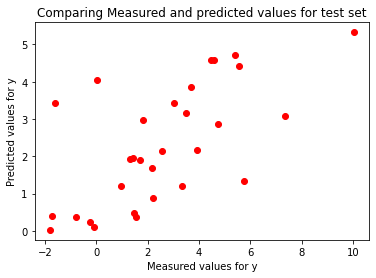

In [8]:
# Comparing true versus predicted values
from sklearn.metrics import mean_squared_error, r2_score
plt.scatter(Y_test, Y_pred_test, color='red')
plt.title('Comparing Measured and predicted values for test set')
plt.xlabel('Measured values for y')
plt.ylabel('Predicted values for y')

# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, Y_pred_test)))
print('R-squared = %.4f' % r2_score(Y_test, Y_pred_test))

__5)PostPocessing: Visualization__
    
Plot predicted regression line against the dropback of test set. Use the lineaRegression.coef_[0] and 
lineaRegression.intercept_[0] to show both the regression cofficient and y intercept

**<font color="red">Code:</font>**


Slope =  -5.510957637305676
Intercept =  5.343851050907217


Text(0, 0.5, 'y')

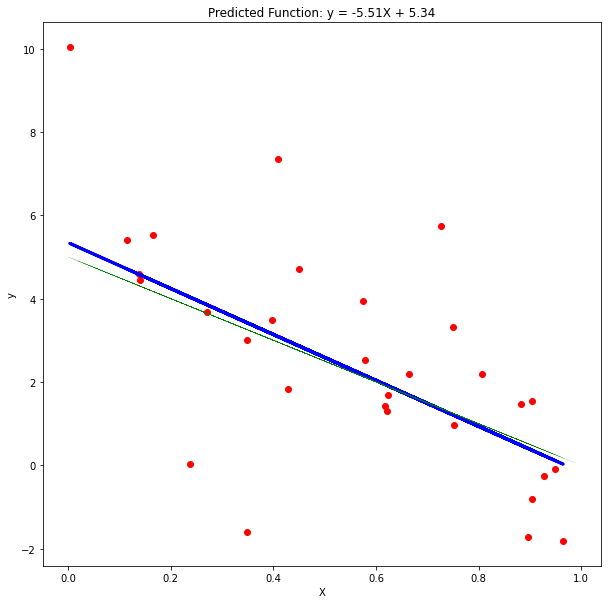

In [9]:
# Display model parameters
print('Slope = ', regr.coef_[0][0])   #get the gradient/regression
print('Intercept = ', regr.intercept_[0])### Step 4: Postprocessing

# Plot outputs
plt.rcParams["figure.figsize"] = (10,10)
plt.scatter(X_test, Y_test,  color='red')
plt.plot(X_test, Y_pred_test, color='blue', linewidth=3)
plt.plot(X, Y_true, 'g-.', linewidth=0.1)
titlestr = 'Predicted Function: y = %.2fX + %.2f' % (regr.coef_[0], regr.intercept_[0])
plt.title(titlestr)
plt.xlabel('X')
plt.ylabel('y')

In [10]:
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

## Question 2: Explore the effect among features that are correlated

The presence of correlated attributes can affect the performance of regression models. We create 
4 additional variables, X2, X3, X4, and X5 that are strongly correlated with the previous variable X created in 
Question 2 with the following relationship. 

1) X2=0.5X + gaussian noise of zero mean and std variation of 0.05

2) X3=0.5X2 + gaussian noise of zero mean and std variation of 0.01

3) X4=0.5X3 + gaussian noise of zero mean and std variation of 0.01

4) X5=0.5X4 + gaussian noise of zero mean and std variation of 0.01


We then fit y against the predictor variables and compare their training and test set errors. 


__Step1: Create the 4 additional features X2 to X5__

**<font color="red">Code:</font>**

In [11]:
seed = 1
np.random.seed(seed)
X2 = 0.5*X + np.random.normal(0, 0.05, size=numInstances).reshape(-1,1)
X3 = 0.5*X2 + np.random.normal(0, 0.01, size=numInstances).reshape(-1,1)
X4 = 0.5*X3 + np.random.normal(0, 0.01, size=numInstances).reshape(-1,1)
X5 = 0.5*X4 + np.random.normal(0, 0.01, size=numInstances).reshape(-1,1)
print(X.shape, X2.shape, X3.shape, X4.shape, X5.shape)

(100, 1) (100, 1) (100, 1) (100, 1) (100, 1)


__Step 2: Plot the pairwise correlation among each other__ using np.correcoef to find correlation for  
    
1)Between X and X2

2)Between X2 and X3

3)Between X3 and X4

4)Between X4 and X5

Use np.column_stack to stack two set of data

**<font color="red">Code:</font>**


Text(0.5, 1.0, 'Correlation between X4 and X5 = 0.8825')

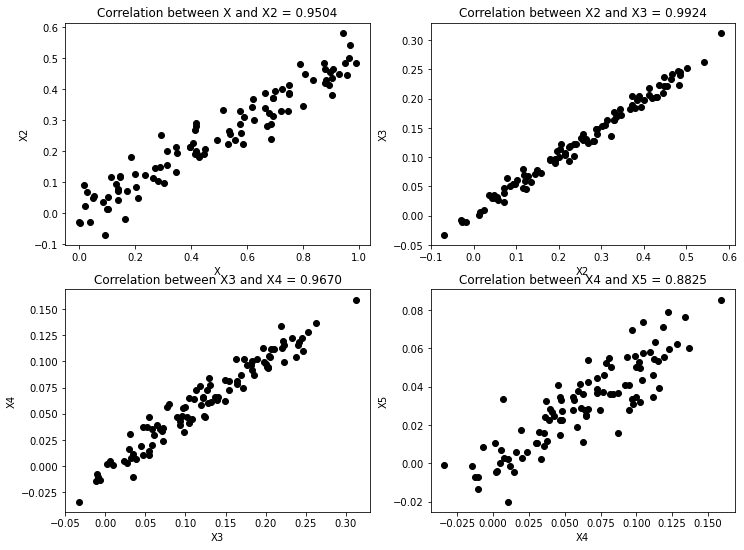

In [12]:
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(12,9))
ax1.scatter(X, X2, color='black')
ax1.set_xlabel('X')
ax1.set_ylabel('X2')
c = np.corrcoef(np.column_stack((X[:-numTest],X2[:-numTest])).T) # Pearson product-moment correlation coefficients
titlestr = 'Correlation between X and X2 = %.4f' % (c[0,1])
ax1.set_title(titlestr)

ax2.scatter(X2, X3, color='black')
ax2.set_xlabel('X2')
ax2.set_ylabel('X3')
c = np.corrcoef(np.column_stack((X2[:-numTest],X3[:-numTest])).T) # Pearson product-moment correlation coefficients
titlestr = 'Correlation between X2 and X3 = %.4f' % (c[0,1])
ax2.set_title(titlestr)

ax3.scatter(X3, X4, color='black')
ax3.set_xlabel('X3')
ax3.set_ylabel('X4')
c = np.corrcoef(np.column_stack((X3[:-numTest],X4[:-numTest])).T)
titlestr = 'Correlation between X3 and X4 = %.4f' % (c[0,1])
ax3.set_title(titlestr)

ax4.scatter(X4, X5, color='black')
ax4.set_xlabel('X4')
ax4.set_ylabel('X5')
c = np.corrcoef(np.column_stack((X4[:-numTest],X5[:-numTest])).T)
titlestr = 'Correlation between X4 and X5 = %.4f' % (c[0,1])
ax4.set_title(titlestr)


__Step 3: Create 4 set of training and test set each with ratio of 70:30__ using np.column_stack
        
1)X_train2 = [70 set of X, 70 set of X2] 

1)X_test2 = [30 set of X, 30 set of X2]

2)X_train3 = [70 set of X, 70 set of X2, 70 set of X3] 

2)X_test3 = [30 set of X, 30 set of X2, 30 set of X3]

3)X_train4 = [70 set of X, 70 set of X2, 70 set of X3, 70 set of X4] 

3)X_test4 = [30 set of X, 30 set of X2, 30 set of X3, 30 set of X4]

4)X_train5 = [70 set of X, 70 set of X2, 70 set of X3, 70 set of X4, 70 set of X5] 

4)X_test5 = [30 set of X, 30 set of X2, 30 set of X3, 30 set of X4, 30 set of X5] 
        
        
The first pair, X_train2 and X_test2 have 2 correlated predictor variables, X and X2. 

The second pair, X_train3 and X_test3 have 3 correlated predictor variables, X, X2, and X3. 

The third pair have 4 correlated variables, X, X2, X3, and X4 

The last pair have 5 correlated variables, X, X2, X3, X4, and X5.

**<font color="red">Code:</font>**

In [13]:
X_train2 = np.column_stack((X[:-numTest],X2[:-numTest]))
print(X[:-numTest].shape)
print(X_train2.shape)
print(X_train2[1:5,:])
X_test2 = np.column_stack((X[-numTest:],X2[-numTest:]))
X_train3 = np.column_stack((X[:-numTest],X2[:-numTest],X3[:-numTest]))
X_test3 = np.column_stack((X[-numTest:],X2[-numTest:],X3[-numTest:]))
X_train4 = np.column_stack((X[:-numTest],X2[:-numTest],X3[:-numTest],X4[:-numTest]))
X_test4 = np.column_stack((X[-numTest:],X2[-numTest:],X3[-numTest:],X4[-numTest:]))
X_train5 = np.column_stack((X[:-numTest],X2[:-numTest],X3[:-numTest],X4[:-numTest],X5[:-numTest]))
X_test5 = np.column_stack((X[-numTest:],X2[-numTest:],X3[-numTest:],X4[-numTest:],X5[-numTest:]))

(70, 1)
(70, 2)
[[ 7.20324493e-01  3.29574426e-01]
 [ 1.14374817e-04 -2.63514002e-02]
 [ 3.02332573e-01  9.75178552e-02]
 [ 1.46755891e-01  1.16648327e-01]]


__Step 4: Train the 4 new regression models based on the 4 pairs of training and test data created in the step 3.__
    
Run LinearRegression and fit method for 

1)X_train2 and Y_train

2)X_train3 and Y_train

3)X_train4 and Y_train

4)X_train5 and Y_train

**<font color="red">Code:</font>**


In [14]:
regr2 = linear_model.LinearRegression()
regr2.fit(X_train2, Y_train)
print(X_train2.shape)
print(Y_train.shape)
regr3 = linear_model.LinearRegression()
regr3.fit(X_train3, Y_train)

regr4 = linear_model.LinearRegression()
regr4.fit(X_train4, Y_train)

regr5 = linear_model.LinearRegression()
regr5.fit(X_train5, Y_train)

(70, 2)
(70, 1)


LinearRegression()

__Step 5 : Apply created regression model to both training and test data sets__

Predict the output training output and test output 

1)Y_pred_train, Y_pred_train2,Y_pred_train3,Y_pred_train4,Y_pred_train5

2)Y_pred_test,Y_pred_test2,Y_pred_test3,Y_pred_test4,Y_pred_test5 

with the respective training and test of X namely 

1)X_train, X_train2, X_train3, X_train4, X_train5 

2)X_test, X_test2, X_test3, X_test4, X_test5

**<font color="red">Code:</font>**

In [15]:
Y_pred_train = regr.predict(X_train)
Y_pred_test = regr.predict(X_test)
Y_pred_train2 = regr2.predict(X_train2)
Y_pred_test2 = regr2.predict(X_test2)
Y_pred_train3 = regr3.predict(X_train3)
Y_pred_test3 = regr3.predict(X_test3)
Y_pred_train4 = regr4.predict(X_train4)
Y_pred_test4 = regr4.predict(X_test4)
Y_pred_train5 = regr5.predict(X_train5)
Y_pred_test5 = regr5.predict(X_test5)

__Step6: PostProcessing-Visualization__
    
For postprocessing, compute both the training and test errors of the models. Show the resulting model and 
the sum of the absolute weights of the regression coefficients, i.e., $\sum_{j=0}^k |w_j|$, where $k$ is the 
number of predictor features.

1)obtain RMSE error between Y_train and Y_pred_train

2)obtain RMSE error between Y_test and Y_pred_test

3)obtain sum of the weight as shown above in the formulae

**<font color="red">Code:</font>**

,Model,Train error,Test error,Sum of Absolute Weights
0,-5.51 X + 5.34,1.648503,2.084219,10.854809
1,-3.44 X + -4.15 X2 + 5.36,1.636466,2.068783,12.949972
2,-3.77 X + 6.56 X2 + -20.53 X3 + 5.42,1.625368,2.124767,36.282632
3,-3.70 X + 6.01 X2 + -18.17 X3 + -2.83 X4 + 5.41,1.625115,2.120890,36.116948
4,-3.72 X + 5.83 X2 + -17.61 X3 + -5.60 X4 + 5.2...,1.624172,2.122645,43.440441


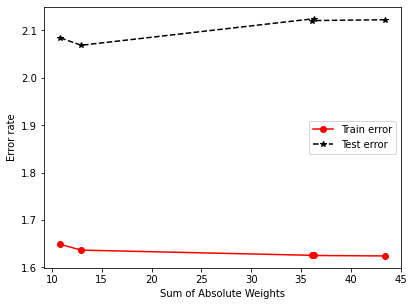

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

columns = ['Model', 'Train error', 'Test error', 'Sum of Absolute Weights']
model1 = "%.2f X + %.2f" % (regr.coef_[0][0], regr.intercept_[0])
values1 = [ model1, np.sqrt(mean_squared_error(Y_train, Y_pred_train)), 
           np.sqrt(mean_squared_error(Y_test, Y_pred_test)),
           np.absolute(regr.coef_[0]).sum() + np.absolute(regr.intercept_[0])]

model2 = "%.2f X + %.2f X2 + %.2f" % (regr2.coef_[0][0], regr2.coef_[0][1], regr2.intercept_[0])
values2 = [ model2, np.sqrt(mean_squared_error(Y_train, Y_pred_train2)), 
           np.sqrt(mean_squared_error(Y_test, Y_pred_test2)),
           np.absolute(regr2.coef_[0]).sum() + np.absolute(regr2.intercept_[0])]

model3 = "%.2f X + %.2f X2 + %.2f X3 + %.2f" % (regr3.coef_[0][0], regr3.coef_[0][1], 
                                                regr3.coef_[0][2], regr3.intercept_[0])
values3 = [ model3, np.sqrt(mean_squared_error(Y_train, Y_pred_train3)), 
           np.sqrt(mean_squared_error(Y_test, Y_pred_test3)),
           np.absolute(regr3.coef_[0]).sum() + np.absolute(regr3.intercept_[0])]

model4 = "%.2f X + %.2f X2 + %.2f X3 + %.2f X4 + %.2f" % (regr4.coef_[0][0], regr4.coef_[0][1], 
                                        regr4.coef_[0][2], regr4.coef_[0][3], regr4.intercept_[0])
values4 = [ model4, np.sqrt(mean_squared_error(Y_train, Y_pred_train4)), 
           np.sqrt(mean_squared_error(Y_test, Y_pred_test4)),
           np.absolute(regr4.coef_[0]).sum() + np.absolute(regr4.intercept_[0])]

model5 = "%.2f X + %.2f X2 + %.2f X3 + %.2f X4 + %.2f X5 + %.2f" % (regr5.coef_[0][0], 
                                        regr5.coef_[0][1], regr5.coef_[0][2], 
                                        regr5.coef_[0][3], regr5.coef_[0][4], regr5.intercept_[0])
values5 = [ model5, np.sqrt(mean_squared_error(Y_train, Y_pred_train5)), 
           np.sqrt(mean_squared_error(Y_test, Y_pred_test5)),
           np.absolute(regr5.coef_[0]).sum() + np.absolute(regr5.intercept_[0])]

results = pd.DataFrame([values1, values2, values3, values4, values5], columns=columns)

plt.plot(results['Sum of Absolute Weights'], results['Train error'], 'ro-')
plt.plot(results['Sum of Absolute Weights'], results['Test error'], 'k*--')
plt.legend(['Train error', 'Test error'])
plt.xlabel('Sum of Absolute Weights')
plt.ylabel('Error rate')

results

In [17]:
print(regr5.coef_[0], regr5.intercept_[0])

[ -3.71552637   5.83236697 -17.60975834  -5.60395508   5.28071349] 5.3981210805128095


In [18]:
np.absolute(regr5.coef_[0]).sum() + np.absolute(regr5.intercept_[0])

43.44044133458759

In [19]:
print(model5)

-3.72 X + 5.83 X2 + -17.61 X3 + -5.60 X4 + 5.28 X5 + 5.40


Observation:

The results above show that the first model, which fits y against X only, has the largest training error, but 
smallest test error, whereas the fifth model, which fits y against X and other correlated attributes, has the 
smallest training error but largest test error. This is due to a phenomenon known as model overfitting, in which 
the low training error of the model does not reflect how well the model will perform on previously unseen test 
instances. From the plot shown above, observe that the disparity between the training and test errors becomes 
wider as the sum of absolute weights of the model (which represents the model complexity) increases. Thus, one 
should control the complexity of the regression model to avoid the model overfitting problem.

## Question 3: Regularization

__i)Ridge regression__ is a variant of MLR designed to fit a linear model to the dataset by minimizing the following 
regularized least-square loss function:
$$L_{\textrm{ridge}}(y,f(X,w)) = \sum_{i=1}^N \|y_i - X_iw - w_0\|^2 + \alpha \bigg[\|w\|^2 + w_0^2 \bigg],$$
where $\alpha$ is the hyperparameter for ridge regression. Note that the ridge regression model reduces to MLR when
$\alpha = 0$. By increasing the value of $\alpha$, we can control the complexity of the model 

__Step1:Train the Ridge model__

1)Import sklearn.linear_model libray. 

2)Use the Ridge(alpha=0.5) method. Set $\alpha$=0.5

3)Use fit() method to train on the X_train5 and Y_train to get the Ridge model

**<font color="red">Code:</font>**

In [20]:
from sklearn import linear_model

ridge = linear_model.Ridge(alpha=0.5)
ridge.fit(X_train5, Y_train)

Ridge(alpha=0.5)

__Step2:Predict the output using the trained model__
 
1)Use the predict() method to obtain the 

i)Y_pred_train_ridge with X_train5 data

ii)Y_pred_test_ridge with X_test5 data


**<font color="red">Code:</font>**

In [21]:
Y_pred_train_ridge = ridge.predict(X_train5)
Y_pred_test_ridge = ridge.predict(X_test5)

__Step3: Performance Evaluation and show the results__
    
1)use RMSE error between Y_train and Y_pred_train_ridge

2)use RMSE error between Y_test and Y_pred_test_ridge

3)obtain sum of the weight

**<font color="red">Code:</font>**

In [22]:
model6 = "%.2f X + %.2f X2 + %.2f X3 + %.2f X4 + %.2f X5 + %.2f" % (ridge.coef_[0][0], 
                                        ridge.coef_[0][1], ridge.coef_[0][2], 
                                        ridge.coef_[0][3], ridge.coef_[0][4], ridge.intercept_[0])
values6 = [ model6, np.sqrt(mean_squared_error(Y_train, Y_pred_train_ridge)), 
           np.sqrt(mean_squared_error(Y_test, Y_pred_test_ridge)),
           np.absolute(ridge.coef_[0]).sum() + np.absolute(ridge.intercept_[0])]

ridge_results = pd.DataFrame([values6], columns=columns, index=['Ridge'])
pd.concat([results, ridge_results])

,Model,Train error,Test error,Sum of Absolute Weights
0,-5.51 X + 5.34,1.648503,2.084219,10.854809
1,-3.44 X + -4.15 X2 + 5.36,1.636466,2.068783,12.949972
2,-3.77 X + 6.56 X2 + -20.53 X3 + 5.42,1.625368,2.124767,36.282632
3,-3.70 X + 6.01 X2 + -18.17 X3 + -2.83 X4 + 5.41,1.625115,2.120890,36.116948
4,-3.72 X + 5.83 X2 + -17.61 X3 + -5.60 X4 + 5.2...,1.624172,2.122645,43.440441
Ridge,-3.68 X + -2.18 X2 + -1.30 X3 + -0.78 X4 + -0....,1.637614,2.081394,13.422831


In [23]:
print(ridge.coef_)

[[-3.67866662 -2.18335516 -1.30204378 -0.77537455 -0.26566152]]


In [24]:
np.absolute(ridge.coef_[0]).sum()

8.205101629416403

In [25]:
print(ridge.intercept_)

[5.21772955]


In [26]:
print(np.absolute(ridge.coef_[0]).sum() + ridge.intercept_)

[13.42283118]


In [27]:
print(model6)

-3.68 X + -2.18 X2 + -1.30 X3 + -0.78 X4 + -0.27 X5 + 5.22


Observation:
    
By setting an appropriate value for the hyperparameter,$\alpha$, the sum of absolute weights can be controlled, 
thus producing a test error that is quite comparable to that of MLR without the correlated attributes.

__ii)Lasso regression__: Least Absolute Shrinkage and Selection Operator

One of the limitations of ridge regression is that, although it was able to reduce the regression coefficients 
associated with the correlated attributes and reduce the effect of model overfitting, the resulting model is still 
not sparse. Another variation of MLR, called lasso regression, is designed to produce sparser models by imposing an $\ell_1$ regularization on the regression coefficients as shown below:
$$L_{\textrm{lasso}}(y,f(X,w)) = \sum_{i=1}^N \|y_i - X_iw - w_0\|^2 + \alpha \bigg[ \|w\|_1 + |w_0|\bigg]$$

__Step: Repeat the step as in ridge regression__
    
Use the lasso()method but set $\alpha$=0.01

**<font color="red">Code:</font>**

In [28]:
from sklearn import linear_model

lasso = linear_model.Lasso(alpha=0.01)
lasso.fit(X_train5, Y_train)
Y_pred_train_lasso = lasso.predict(X_train5)
Y_pred_test_lasso = lasso.predict(X_test5)

model7 = "%.2f X + %.2f X2 + %.2f X3 + %.2f X4 + %.2f X5 + %.2f" % (lasso.coef_[0], 
                                        lasso.coef_[1], lasso.coef_[2], 
                                        lasso.coef_[3], lasso.coef_[4], lasso.intercept_[0])
values7 = [ model7, np.sqrt(mean_squared_error(Y_train, Y_pred_train_lasso)), 
           np.sqrt(mean_squared_error(Y_test, Y_pred_test_lasso)),
           np.absolute(lasso.coef_).sum() + np.absolute(lasso.intercept_[0])]

lasso_results = pd.DataFrame([values7], columns=columns, index=['Lasso'])
pd.concat([results, ridge_results, lasso_results])

,Model,Train error,Test error,Sum of Absolute Weights
0,-5.51 X + 5.34,1.648503,2.084219,10.854809
1,-3.44 X + -4.15 X2 + 5.36,1.636466,2.068783,12.949972
2,-3.77 X + 6.56 X2 + -20.53 X3 + 5.42,1.625368,2.124767,36.282632
3,-3.70 X + 6.01 X2 + -18.17 X3 + -2.83 X4 + 5.41,1.625115,2.120890,36.116948
4,-3.72 X + 5.83 X2 + -17.61 X3 + -5.60 X4 + 5.2...,1.624172,2.122645,43.440441
Ridge,-3.68 X + -2.18 X2 + -1.30 X3 + -0.78 X4 + -0....,1.637614,2.081394,13.422831
Lasso,-4.41 X + -1.97 X2 + -0.00 X3 + -0.00 X4 + -0....,1.640169,2.077480,11.676981


In [29]:
print(lasso.coef_)

[-4.41313929 -1.96548433 -0.         -0.         -0.        ]


In [30]:
print(lasso.intercept_)

[5.2983571]


In [31]:
np.absolute(lasso.coef_[0]).sum()

4.4131392896391075

In [32]:
print(model7)

-4.41 X + -1.97 X2 + -0.00 X3 + -0.00 X4 + -0.00 X5 + 5.30


Observation:

Observe that the lasso regression model sets the coefficients for the correlated attributes, X3, X4, and X5 to
exactly zero unlike the ridge regression model. As a result, its test error is significantly better than that for
ridge regression.

## Question 4: Model Selection via Cross Validation

While both ridge and lasso regression methods can potentially alleviate the model overfitting problem, one of the 
challenges is how to select the appropriate hyperparameter value, $\alpha$. Using k-fold cross-validation method to
select the best hyperparameter of the model. 

Using the RidgeCV() function, we can train a model with k-fold cross-validation and select the best hyperparameter 
value.Set k=5 and $\alpha$ range from 0.3 to 1 in step of 0.2

**<font color="red">Code:</font>**

In [33]:
from sklearn import linear_model

ridge = linear_model.RidgeCV(alphas=[0.3,0.5,0.7,0.9,1.0],cv=5)
ridge.fit(X_train5, Y_train)
Y_pred_train_ridge = ridge.predict(X_train5)
Y_pred_test_ridge = ridge.predict(X_test5)

model6 = "%.2f X + %.2f X2 + %.2f X3 + %.2f X4 + %.2f X5 + %.2f" % (ridge.coef_[0][0], 
                                        ridge.coef_[0][1], ridge.coef_[0][2], 
                                        ridge.coef_[0][3], ridge.coef_[0][4], ridge.intercept_[0])
values6 = [ model6, np.sqrt(mean_squared_error(Y_train, Y_pred_train_ridge)), 
           np.sqrt(mean_squared_error(Y_test, Y_pred_test_ridge)),
           np.absolute(ridge.coef_[0]).sum() + np.absolute(ridge.intercept_[0])]
print("Selected alpha = %.2f" % ridge.alpha_)

ridge_results = pd.DataFrame([values6], columns=columns, index=['RidgeCV'])
pd.concat([results, ridge_results])

Selected alpha = 0.70


,Model,Train error,Test error,Sum of Absolute Weights
0,-5.51 X + 5.34,1.648503,2.084219,10.854809
1,-3.44 X + -4.15 X2 + 5.36,1.636466,2.068783,12.949972
2,-3.77 X + 6.56 X2 + -20.53 X3 + 5.42,1.625368,2.124767,36.282632
3,-3.70 X + 6.01 X2 + -18.17 X3 + -2.83 X4 + 5.41,1.625115,2.120890,36.116948
4,-3.72 X + 5.83 X2 + -17.61 X3 + -5.60 X4 + 5.2...,1.624172,2.122645,43.440441
RidgeCV,-3.64 X + -2.10 X2 + -1.20 X3 + -0.70 X4 + -0....,1.640295,2.084947,13.053452


In [34]:
print(ridge.coef_)

[[-3.63870469 -2.10049915 -1.19739457 -0.69656312 -0.25709992]]


In [35]:
np.absolute(ridge.coef_[0]).sum()

7.890261458577355

In [36]:
print(ridge.intercept_)

[5.16319044]


In [37]:
print(np.absolute(ridge.coef_[0]).sum() + ridge.intercept_)

[13.0534519]


In [38]:
print(model6)

-3.64 X + -2.10 X2 + -1.20 X3 + -0.70 X4 + -0.26 X5 + 5.16


Observation:
    
Ridge CV tried to optimize between train error, test error and sum of absolute weights and choose the best $\alpha$

## Question 5: Basis Function Regression

To adapt linear regression to nonlinear relationships between variables, the data can be transformed using basis 
functions. Using the PolynomialRegression pipeline in sklearn.preprocessing, the idea is to take the 
multidimensional linear model: 
    
   $$y = w_0 + w_1 x_1 + w_2 x_2 + w_3 x_3 + \cdots$$ 

and build the $x_1, x_2, x_3,$ and so on, from the single-dimensional input $x$. That is, let $x_n = f_n(x)$, where
$f_n()$ is some function that transforms our data. For example, if $f_n(x) = x^n$, the model becomes a polynomial 
regression: 
    $$y = w_0 + w_1 x + w_2 x^2 + w_3 x^3 + \cdots$$ 
    
Notice that this is still a linear model—the linearity refers to the fact that the coefficients $w_n$ never
multiply or divide each other. Effectively done is taken the one-dimensional $x$ values and projected them into a 
higher dimension, so that a linear fit can fit more complicated relationships between $x$ and $y$.

__Step 1: Import the polynomialFeatures class from sklearn.preprocessing library__

1)Create 1 dimensional column array $x$ of size 3 with values say 1 2 3 using np.array([1,2,3])

2)create a object called poly by using PolynominaFeatures (3, include_bias=False). This will set transform the 
any input $x$ to 3 inputs with increasing raised power.  $x , x^2 , x^3 $

3)fit.transform the input data $x$

**<font color="red">Code:</font>**

In [39]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([1, 2, 3])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 1.,  1.,  1.],
       [ 2.,  4.,  8.],
       [ 3.,  9., 27.]])

Observation:

The polynomial transformer has converted one-dimensional array into a three-dimensional array by taking 
the exponent of each value. This new, higher-dimensional data representation can then be plugged into a 
linear regression.

__Step 2: Make a 10th order polynomial model__
    
1)from the sklearn.pipeline import make_pipeline

2)from the sklearn.linear_model import LinearRegression

3)Combine both PolynomialFeatures and LinearRegression class into poly_model 
by using make_pipeline(PolynomialFeatures,LinearRegression()). Use the polynonimal order equal to 10

**<font color="red">Code:</font>**

In [40]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
poly_model = make_pipeline(PolynomialFeatures(10),
                           LinearRegression())

__Step 3: Create the input data__
    
1)create the 100 uniformly distrbuted value for the x axis that range from 0 to 20 using 
np.random.Randomstate().rand

2)create a y=sin(x)+ $\epsilon$ where $\epsilon$ =normal distrbuted noise with mean 0 and standard deviation of 1. 
Use randn function

**<font color="red">Code:</font>**

In [41]:
x = 20 * np.random.RandomState(1).rand(100)    #100 rows of uniform distrbuted data between 0 to 20
y = np.sin(x) + 0.1 * np.random.RandomState(1).randn(100) #100 rows of normal distrbuted data for y 

__Step 4: Build the model__

1)build the model with the data $x$ by first converting it to 100x1 matrix using x[:,np.newaxis]

2)create the model by feeding both matrix new $x$ and the y data using fit() function


In [42]:
poly_model.fit(x[:,np.newaxis], y) #convert to 100x1 matrix for x and feed both x and y data for building the model

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=10)),
                ('linearregression', LinearRegression())])

__Step 5: Test the model and the plot the original data(x,y) verus (x,predicted y)__
    
1)create the 1000 linearly spaced values of $x$ axis values between 0 to 20 by using np.linspace() function. 
Called  x_test.

2)Feed the x_test values into the predict() function of the poly_model

3)plot the scatterplot of original x and y and overlay with the x_test and the predicted y values

**<font color="red">Code:</font>**

In [43]:
xtest = np.linspace(0, 20, 1000)
ytest = poly_model.predict(xtest[:, np.newaxis])

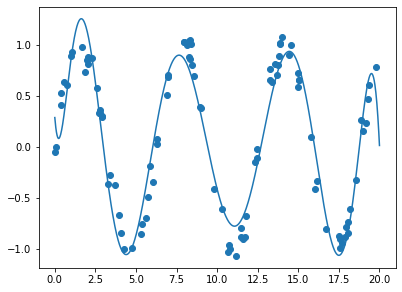

In [44]:
plt.scatter(x, y)
plt.plot(xtest, ytest);

Observation:
    
Polynomial of 10 is able to track the sine wave to certain precisiona and accuracy.